In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

# Prepare Data

In [2]:
df = pd.read_csv("F://Uni/991/Machine_Learning/ML_HW4/Datasets/1/parkinsons.data")
df = df.sample(frac=1 ,replace=False, axis = 0).reset_index(drop=True)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
1,phon_R01_S20_2,100.770,115.697,85.545,0.01038,0.00010,0.00622,0.00576,0.01865,0.03121,...,0.05320,0.02220,19.200,1,0.594387,0.790117,-4.913885,0.265699,2.398422,0.277948
2,phon_R01_S17_4,228.832,234.619,223.634,0.00296,0.00001,0.00175,0.00155,0.00526,0.01644,...,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
3,phon_R01_S13_1,122.188,128.611,115.765,0.00524,0.00004,0.00169,0.00203,0.00507,0.01613,...,0.02566,0.00839,23.162,0,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
4,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756


In [3]:
x = df.drop(columns=['name', 'status'])
#x = normalize(x)
y = df['status']

In [4]:
print(np.where(x==np.nan))

(array([], dtype=int64), array([], dtype=int64))


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# Linear Kernel

In [7]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred = linear_svc.predict(x_test)

In [9]:
acc = accuracy_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred, average=None)

print('Linear SVM Accuracy: ', acc)
print('Linear SVM F1-Measure: ', f1s)

Linear SVM Accuracy:  0.8813559322033898
Linear SVM F1-Measure:  [0.77419355 0.91954023]


# Polynomial Kernel

In [30]:
degree = list([3,6,7,9,12])
coef0list = list([0,3,6,9])
f10list = np.zeros((len(degree),len(coef0list)))
f11list = np.zeros((len(degree),len(coef0list)))
acclist = np.zeros((len(degree),len(coef0list)))
i,j=0,0
for d in degree:
    for c in coef0list:
        polynomial_svc = svm.SVC(kernel='poly', degree=d, coef0=c)
        polynomial_svc.fit(x_train, y_train)
        y_pred = polynomial_svc.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        f1s = f1_score(y_test, y_pred, average=None)
        f10list[i,j]=f1s[0]
        f11list[i,j]=f1s[1]
        acclist[i,j]=acc
        j+=1
        print('Polynomial SVM Accuracy: ', acc, 'for Degree= ', d, 'for r= ', c)
        print('Polynomial SVM F1-Measure: ', f1s, 'for Degree= ', d, 'for r= ', c)
        print('---------------------------------------------------------------')
    i+=1
    j=0

Polynomial SVM Accuracy:  0.7627118644067796 for Degree=  3 for r=  0
Polynomial SVM F1-Measure:  [0.46153846 0.84782609] for Degree=  3 for r=  0
---------------------------------------------------------------
Polynomial SVM Accuracy:  0.7627118644067796 for Degree=  3 for r=  3
Polynomial SVM F1-Measure:  [0.46153846 0.84782609] for Degree=  3 for r=  3
---------------------------------------------------------------
Polynomial SVM Accuracy:  0.7627118644067796 for Degree=  3 for r=  6
Polynomial SVM F1-Measure:  [0.46153846 0.84782609] for Degree=  3 for r=  6
---------------------------------------------------------------
Polynomial SVM Accuracy:  0.7627118644067796 for Degree=  3 for r=  9
Polynomial SVM F1-Measure:  [0.46153846 0.84782609] for Degree=  3 for r=  9
---------------------------------------------------------------
Polynomial SVM Accuracy:  0.7627118644067796 for Degree=  6 for r=  0
Polynomial SVM F1-Measure:  [0.41666667 0.85106383] for Degree=  6 for r=  0
---------

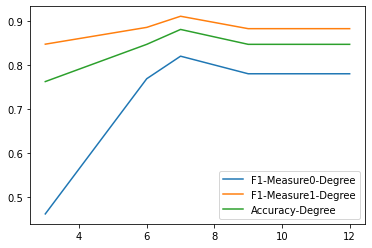

In [31]:
plt.plot(degree, f10list[:,3],label='F1-Measure0-Degree')
plt.plot(degree, f11list[:,3],label='F1-Measure1-Degree')
plt.plot(degree, acclist[:,3],label='Accuracy-Degree')
plt.legend()
plt.show()

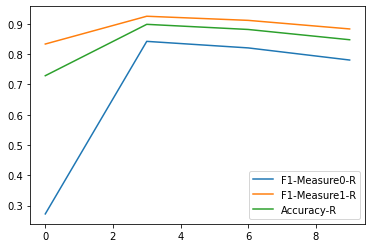

In [32]:
plt.plot(coef0list, f10list[3,:],label='F1-Measure0-R')
plt.plot(coef0list, f11list[3,:],label='F1-Measure1-R')
plt.plot(coef0list, acclist[3,:],label='Accuracy-R')
plt.legend()
plt.show()

# RBF Kernel

In [24]:
gammalist = list([1e-6, 1e-4,1e-3,3e-3,5e-3,7e-3, 1e-2, 1e-1])
f11list,f10list,acclist=list(),list(),list()
for g in gammalist:
    rbf_svc = svm.SVC(kernel='rbf', gamma=g)
    rbf_svc.fit(x_train, y_train)
    y_pred = rbf_svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1s = f1_score(y_test, y_pred, average=None)
    f11list.append(f1s[1])
    f10list.append(f1s[0])
    acclist.append(acc)
    print('RBF SVM Accuracy: ', acc, 'for Gamma= ', g)
    print('RBF SVM F1-Measure: ', f1s, 'for Gamma= ', g)
    print('---------------------------------------------------------------')

RBF SVM Accuracy:  0.6779661016949152 for Gamma=  1e-06
RBF SVM F1-Measure:  [0.         0.80808081] for Gamma=  1e-06
---------------------------------------------------------------
RBF SVM Accuracy:  0.7457627118644068 for Gamma=  0.0001
RBF SVM F1-Measure:  [0.34782609 0.84210526] for Gamma=  0.0001
---------------------------------------------------------------
RBF SVM Accuracy:  0.7457627118644068 for Gamma=  0.001
RBF SVM F1-Measure:  [0.34782609 0.84210526] for Gamma=  0.001
---------------------------------------------------------------
RBF SVM Accuracy:  0.7966101694915254 for Gamma=  0.003
RBF SVM F1-Measure:  [0.53846154 0.86956522] for Gamma=  0.003
---------------------------------------------------------------
RBF SVM Accuracy:  0.7966101694915254 for Gamma=  0.005
RBF SVM F1-Measure:  [0.53846154 0.86956522] for Gamma=  0.005
---------------------------------------------------------------
RBF SVM Accuracy:  0.7796610169491526 for Gamma=  0.007
RBF SVM F1-Measure:  [0.48 

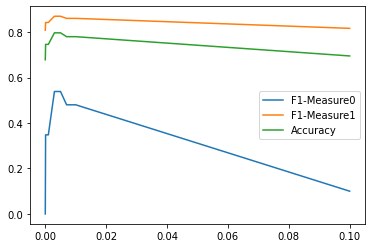

In [25]:
plt.plot(gammalist, f10list,label='F1-Measure0')
plt.plot(gammalist, f11list,label='F1-Measure1')
plt.plot(gammalist, acclist,label='Accuracy')
plt.legend()
plt.show()

# Sigmoid Kernel

In [28]:
coef0list = list([-1000,-1100, -1200,-1250,-1300,-1350,-1375,-1400, -1500, -1600])
f11list,f10list,acclist=list(),list(),list()
for c in coef0list:
    sigmoid_svc = svm.SVC(kernel='sigmoid', gamma=0.01, coef0=c)
    sigmoid_svc.fit(x_train, y_train)
    y_pred = sigmoid_svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1s = f1_score(y_test, y_pred, average=None)
    f11list.append(f1s[1])
    f10list.append(f1s[0])
    acclist.append(acc)
    print('Sigmoid SVM Accuracy: ', acc, 'for r= ', c)
    print('Sigmoid SVM F1-Measure: ', f1s, 'for r= ', c)
    print('---------------------------------------------------------------')    

Sigmoid SVM Accuracy:  0.5423728813559322 for r=  -1000
Sigmoid SVM F1-Measure:  [0.        0.7032967] for r=  -1000
---------------------------------------------------------------
Sigmoid SVM Accuracy:  0.559322033898305 for r=  -1100
Sigmoid SVM F1-Measure:  [0.23529412 0.69047619] for r=  -1100
---------------------------------------------------------------
Sigmoid SVM Accuracy:  0.6610169491525424 for r=  -1200
Sigmoid SVM F1-Measure:  [0.47368421 0.75      ] for r=  -1200
---------------------------------------------------------------
Sigmoid SVM Accuracy:  0.6779661016949152 for r=  -1250
Sigmoid SVM F1-Measure:  [0.48648649 0.7654321 ] for r=  -1250
---------------------------------------------------------------
Sigmoid SVM Accuracy:  0.711864406779661 for r=  -1300
Sigmoid SVM F1-Measure:  [0.51428571 0.79518072] for r=  -1300
---------------------------------------------------------------
Sigmoid SVM Accuracy:  0.7288135593220338 for r=  -1350
Sigmoid SVM F1-Measure:  [0.55555

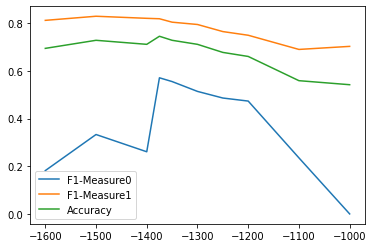

In [29]:
plt.plot(coef0list, f10list,label='F1-Measure0')
plt.plot(coef0list, f11list,label='F1-Measure1')
plt.plot(coef0list, acclist,label='Accuracy')
plt.legend()
plt.show()